<a href="https://colab.research.google.com/github/prashantjadiya/WebsiteClassification/blob/master/Malicious_website_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Data Gathering**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('drive/My Drive/dataset.csv')

# **Data Understanding**
On which data I will train my model?
How the data is correlated with each other?

1.   Which part of data is useful?

2.   How the data is correlated with each other?

3.   On which data I will train my model?






In [4]:
df.shape

(1781, 21)

In [5]:
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,ISO-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,62242.5,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,11,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,ISO-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,UTF-8,nginx/1.10.1,324.0,None,None,8/11/2014 7:41,None,0,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,UTF-8,nginx/1.10.1,324.0,None,None,8/11/2014 7:41,None,0,0,0,0,2,1,62,146,2,2.0,1


In [6]:
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [7]:
print(df.isnull().sum())

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [8]:
df[pd.isnull(df).any(axis=1)]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1306,B0_2134,66,11,UTF-8,NaN,9405.0,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,15,2,4,1026,15,4,246,1026,15,0.0,0


# Prepare Data

Clean the data

In [9]:
df=df.interpolate()
print(df.isnull().sum())

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


In [0]:
df['CHARSET'].unique() 
#turn iso to ISO and utf to UTF
df['CHARSET']=np.where(df['CHARSET'] =='iso-8859-1', 'ISO-8859-1', df['CHARSET'])
df['CHARSET']=np.where(df['CHARSET'] =='utf-8', 'UTF-8', df['CHARSET'])

In [0]:
def replace_values(x):
  '''
  This function replaces conflicting values of countries like uk will be replaced to UK and so on.

  Parameters: 
  Requires the column name of dataframe where you want to replace the values

  Returns null;
  but it will replace value implicitly...
  '''
  df[x]=np.where(df['WHOIS_COUNTRY'] =='United Kingdom', 'UK', df['WHOIS_COUNTRY'])
  df[x]=np.where(df['WHOIS_COUNTRY'] =="[u'GB'; u'UK']", 'UK', df['WHOIS_COUNTRY'])
  df[x]=np.where(df['WHOIS_COUNTRY'] =='United Kingdom', 'UK', df['WHOIS_COUNTRY'])
  df[x]=np.where(df['WHOIS_COUNTRY'] =='us', 'US', df['WHOIS_COUNTRY'])
  df[x]=np.where(df['WHOIS_COUNTRY'] =='se', 'SE', df['WHOIS_COUNTRY'])
  df[x]=np.where(df['WHOIS_COUNTRY'] =='ru', 'RU', df['WHOIS_COUNTRY'])
replace_values("WHOIS_COUNTRY")

In [12]:
df.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,1781.000000,1781,1781,1781,1781,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1781.000000
unique,1781,NaN,NaN,7,239,NaN,44,182,891,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M0_105,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,1055,386,NaN,1106,372,127,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,13497.243964,NaN,NaN,NaN,NaN,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263335,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,38415.552697,NaN,NaN,NaN,NaN,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930036,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,603.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,4714.750000,NaN,NaN,NaN,NaN,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,12578.500000,NaN,NaN,NaN,NaN,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


In [13]:
df['Type'].value_counts() #0 for benign and 1 for mal 

0    1565
1     216
Name: Type, dtype: int64

Visualize to know properly

<Figure size 1080x1080 with 0 Axes>

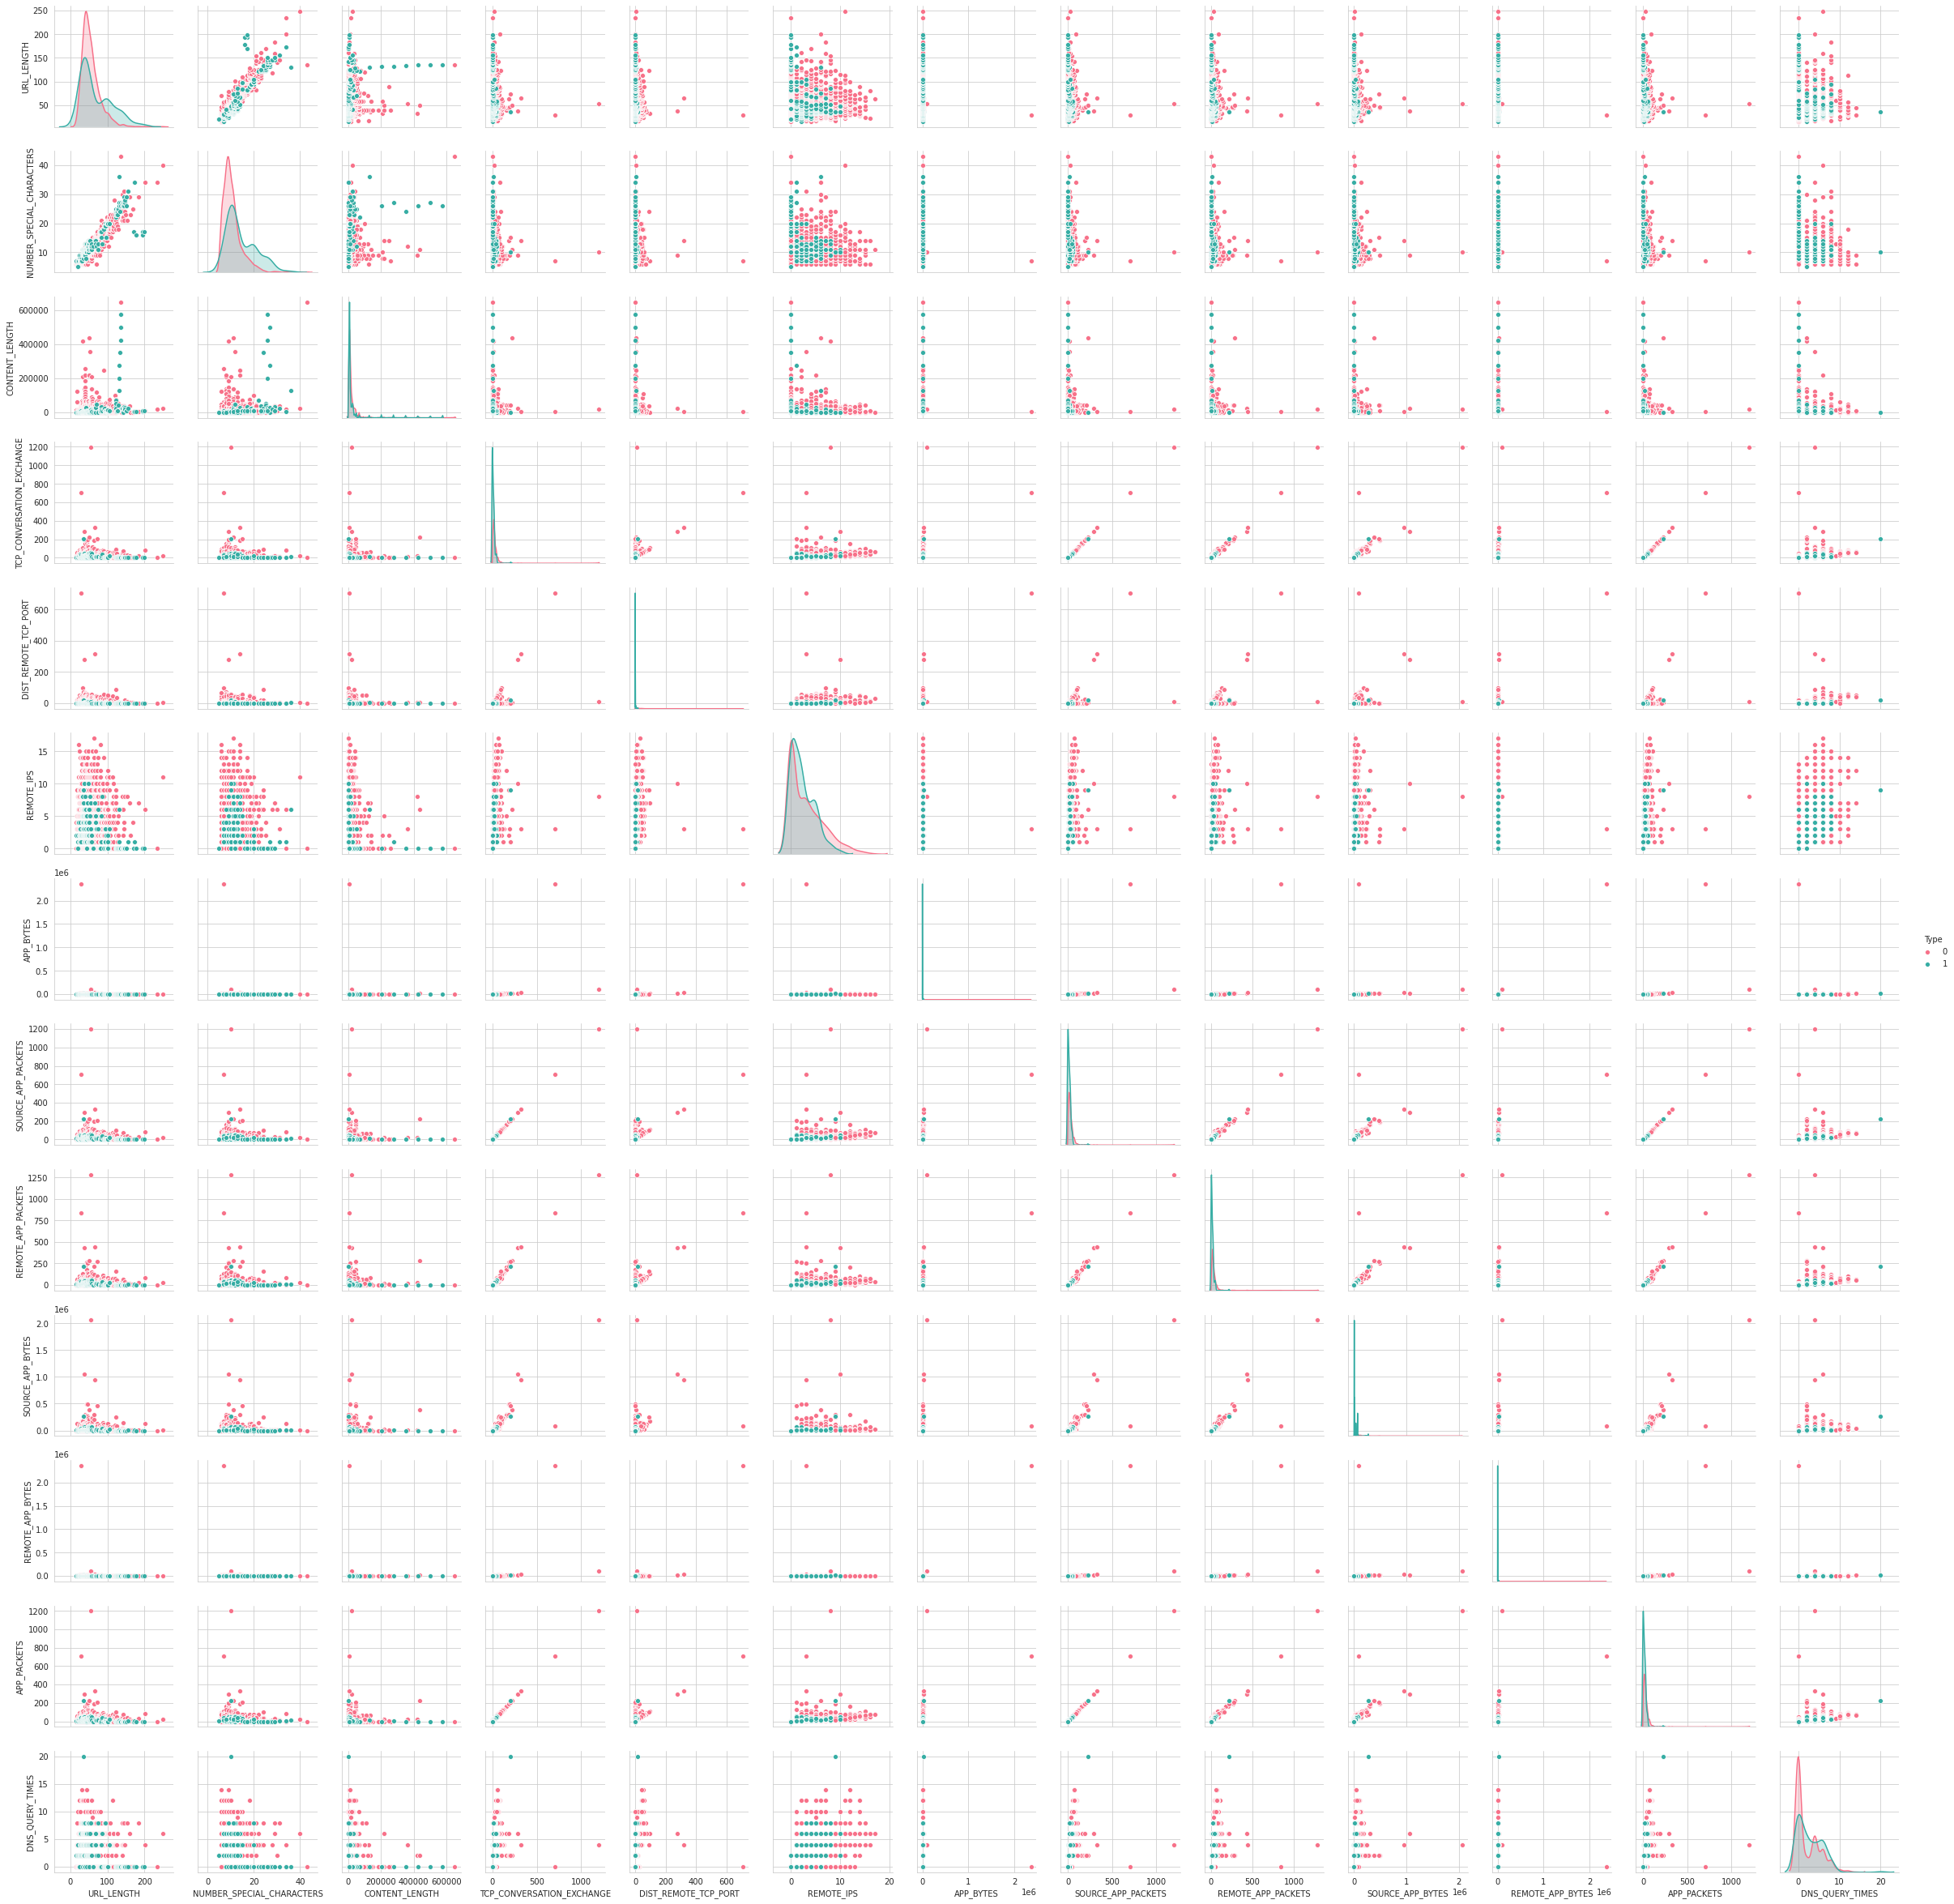

In [14]:
#pair plot
plt.figure(figsize=(15, 15))
sns.set_style("whitegrid");
sns.pairplot(df, hue="Type",palette="husl");
plt.show()

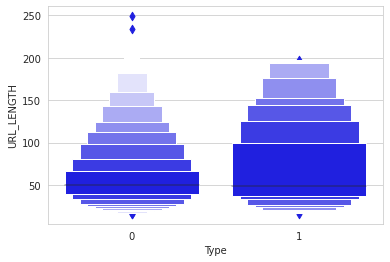

In [15]:
#box plot
sns.boxenplot(data = df, x="Type", y="URL_LENGTH",
              color="b", scale="linear")

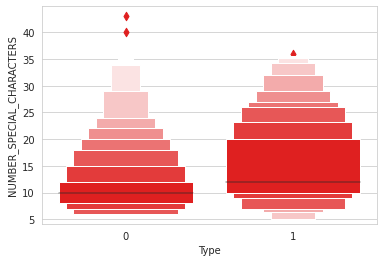

In [16]:
sns.boxenplot(data = df, x="Type", y="NUMBER_SPECIAL_CHARACTERS",
              color="r", scale="linear")

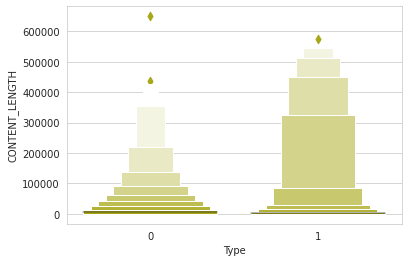

In [17]:
sns.boxenplot(data = df, x="Type", y="CONTENT_LENGTH",
              color="y", scale="linear")

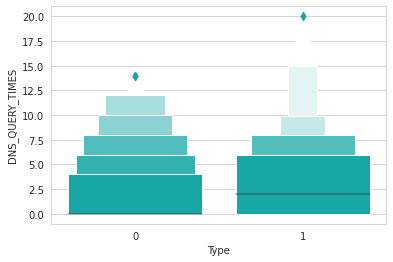

In [18]:
sns.boxenplot(data = df, x="Type", y="DNS_QUERY_TIMES",
              color="c", scale="linear")

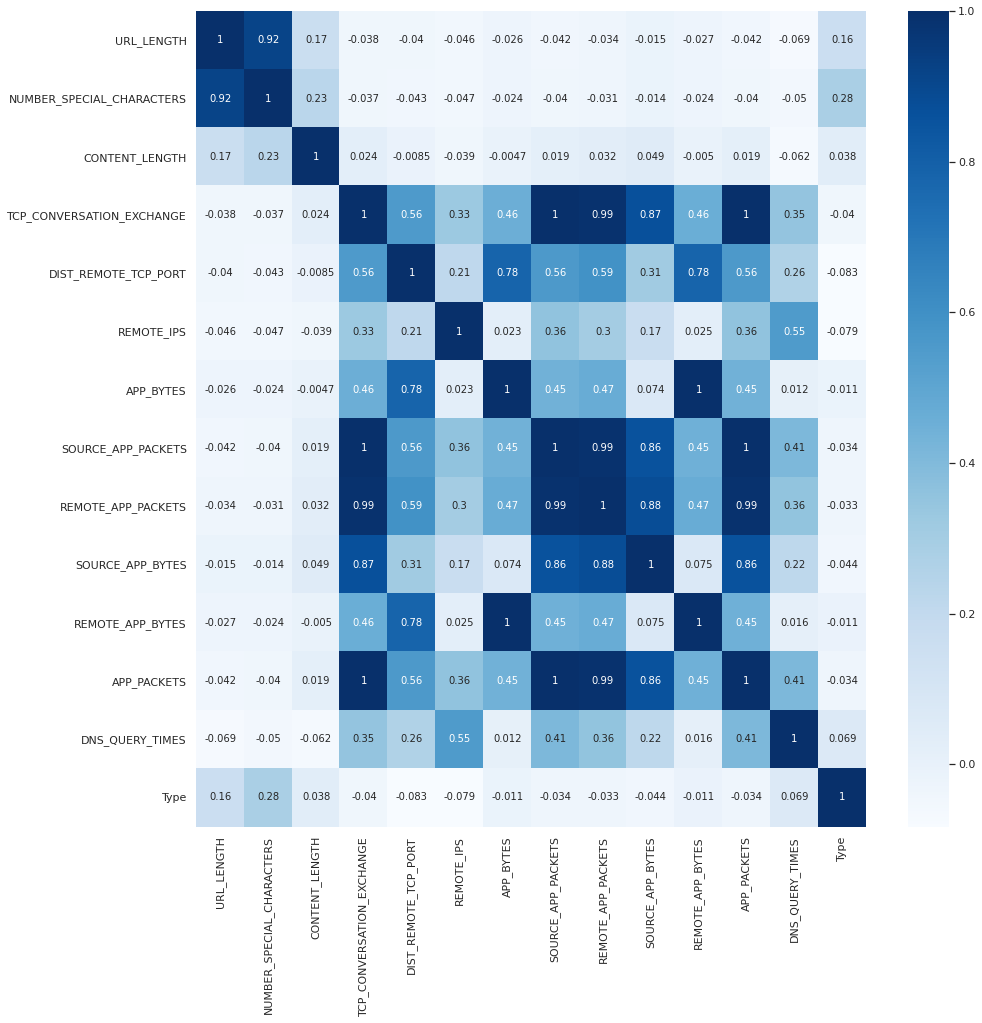

In [19]:
correlation = df.corr()
plt.figure(figsize = (15, 15))
sns.set(font_scale = 1)
sns.heatmap(correlation, annot = True, annot_kws = {'size': 10}, cmap = 'Blues')

# Data Modeling 

Model

LOGISTIC REGRESSION - 89%

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS','DNS_QUERY_TIMES','CONTENT_LENGTH']]
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [22]:
print('Accuracy on test set: {:.2f}'.format(logistic_regression.score(X_test, y_test)))
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print(roc_value)

Accuracy on test set: 0.89
0.5


In [23]:
from sklearn.metrics import accuracy_score,classification_report

print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       399
           1       0.00      0.00      0.00        47

    accuracy                           0.89       446
   macro avg       0.45      0.50      0.47       446
weighted avg       0.80      0.89      0.84       446




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN - 91.48%


In [24]:
from sklearn.neighbors import KNeighborsClassifier
k=35 #sqrt(1246)
from sklearn.metrics import accuracy_score,classification_report


clf = KNeighborsClassifier(n_neighbors=k, p=3, weights='distance',leaf_size=50)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=3,
                     weights='distance')

In [0]:
y_pred = clf.predict(X_test)


In [26]:
print("Accuracy of %d NN: %.2f %%" % (k, 100 * accuracy_score(y_test.to_numpy(), y_pred)))
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print(roc_value)

Accuracy of 35 NN: 91.48 %
0.6802111662134058


In [27]:
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       399
           1       0.67      0.38      0.49        47

    accuracy                           0.91       446
   macro avg       0.80      0.68      0.72       446
weighted avg       0.90      0.91      0.90       446




SVM - 89.46%

In [0]:
from sklearn import svm

In [29]:
svm_clf=svm.SVC()
svm_clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = svm_clf.predict(X_test)

In [31]:
print("Accuracy of SVM: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print(roc_value)

Accuracy of SVM: 89.46 %
0.5


In [32]:
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       399
           1       0.00      0.00      0.00        47

    accuracy                           0.89       446
   macro avg       0.45      0.50      0.47       446
weighted avg       0.80      0.89      0.84       446




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest classifier - 95.29%

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [34]:
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred=clf.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,classification_report

print("Accuracy of Random forest: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
print(roc_value)

Accuracy of Random forest: 95.29 %
0.7953660747613714


In [37]:
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),y_pred)))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       399
           1       0.93      0.60      0.73        47

    accuracy                           0.95       446
   macro avg       0.94      0.80      0.85       446
weighted avg       0.95      0.95      0.95       446




# Evaluation results (Why RF is better?)

Analyze

In [0]:
estimator = clf.estimators_[0]


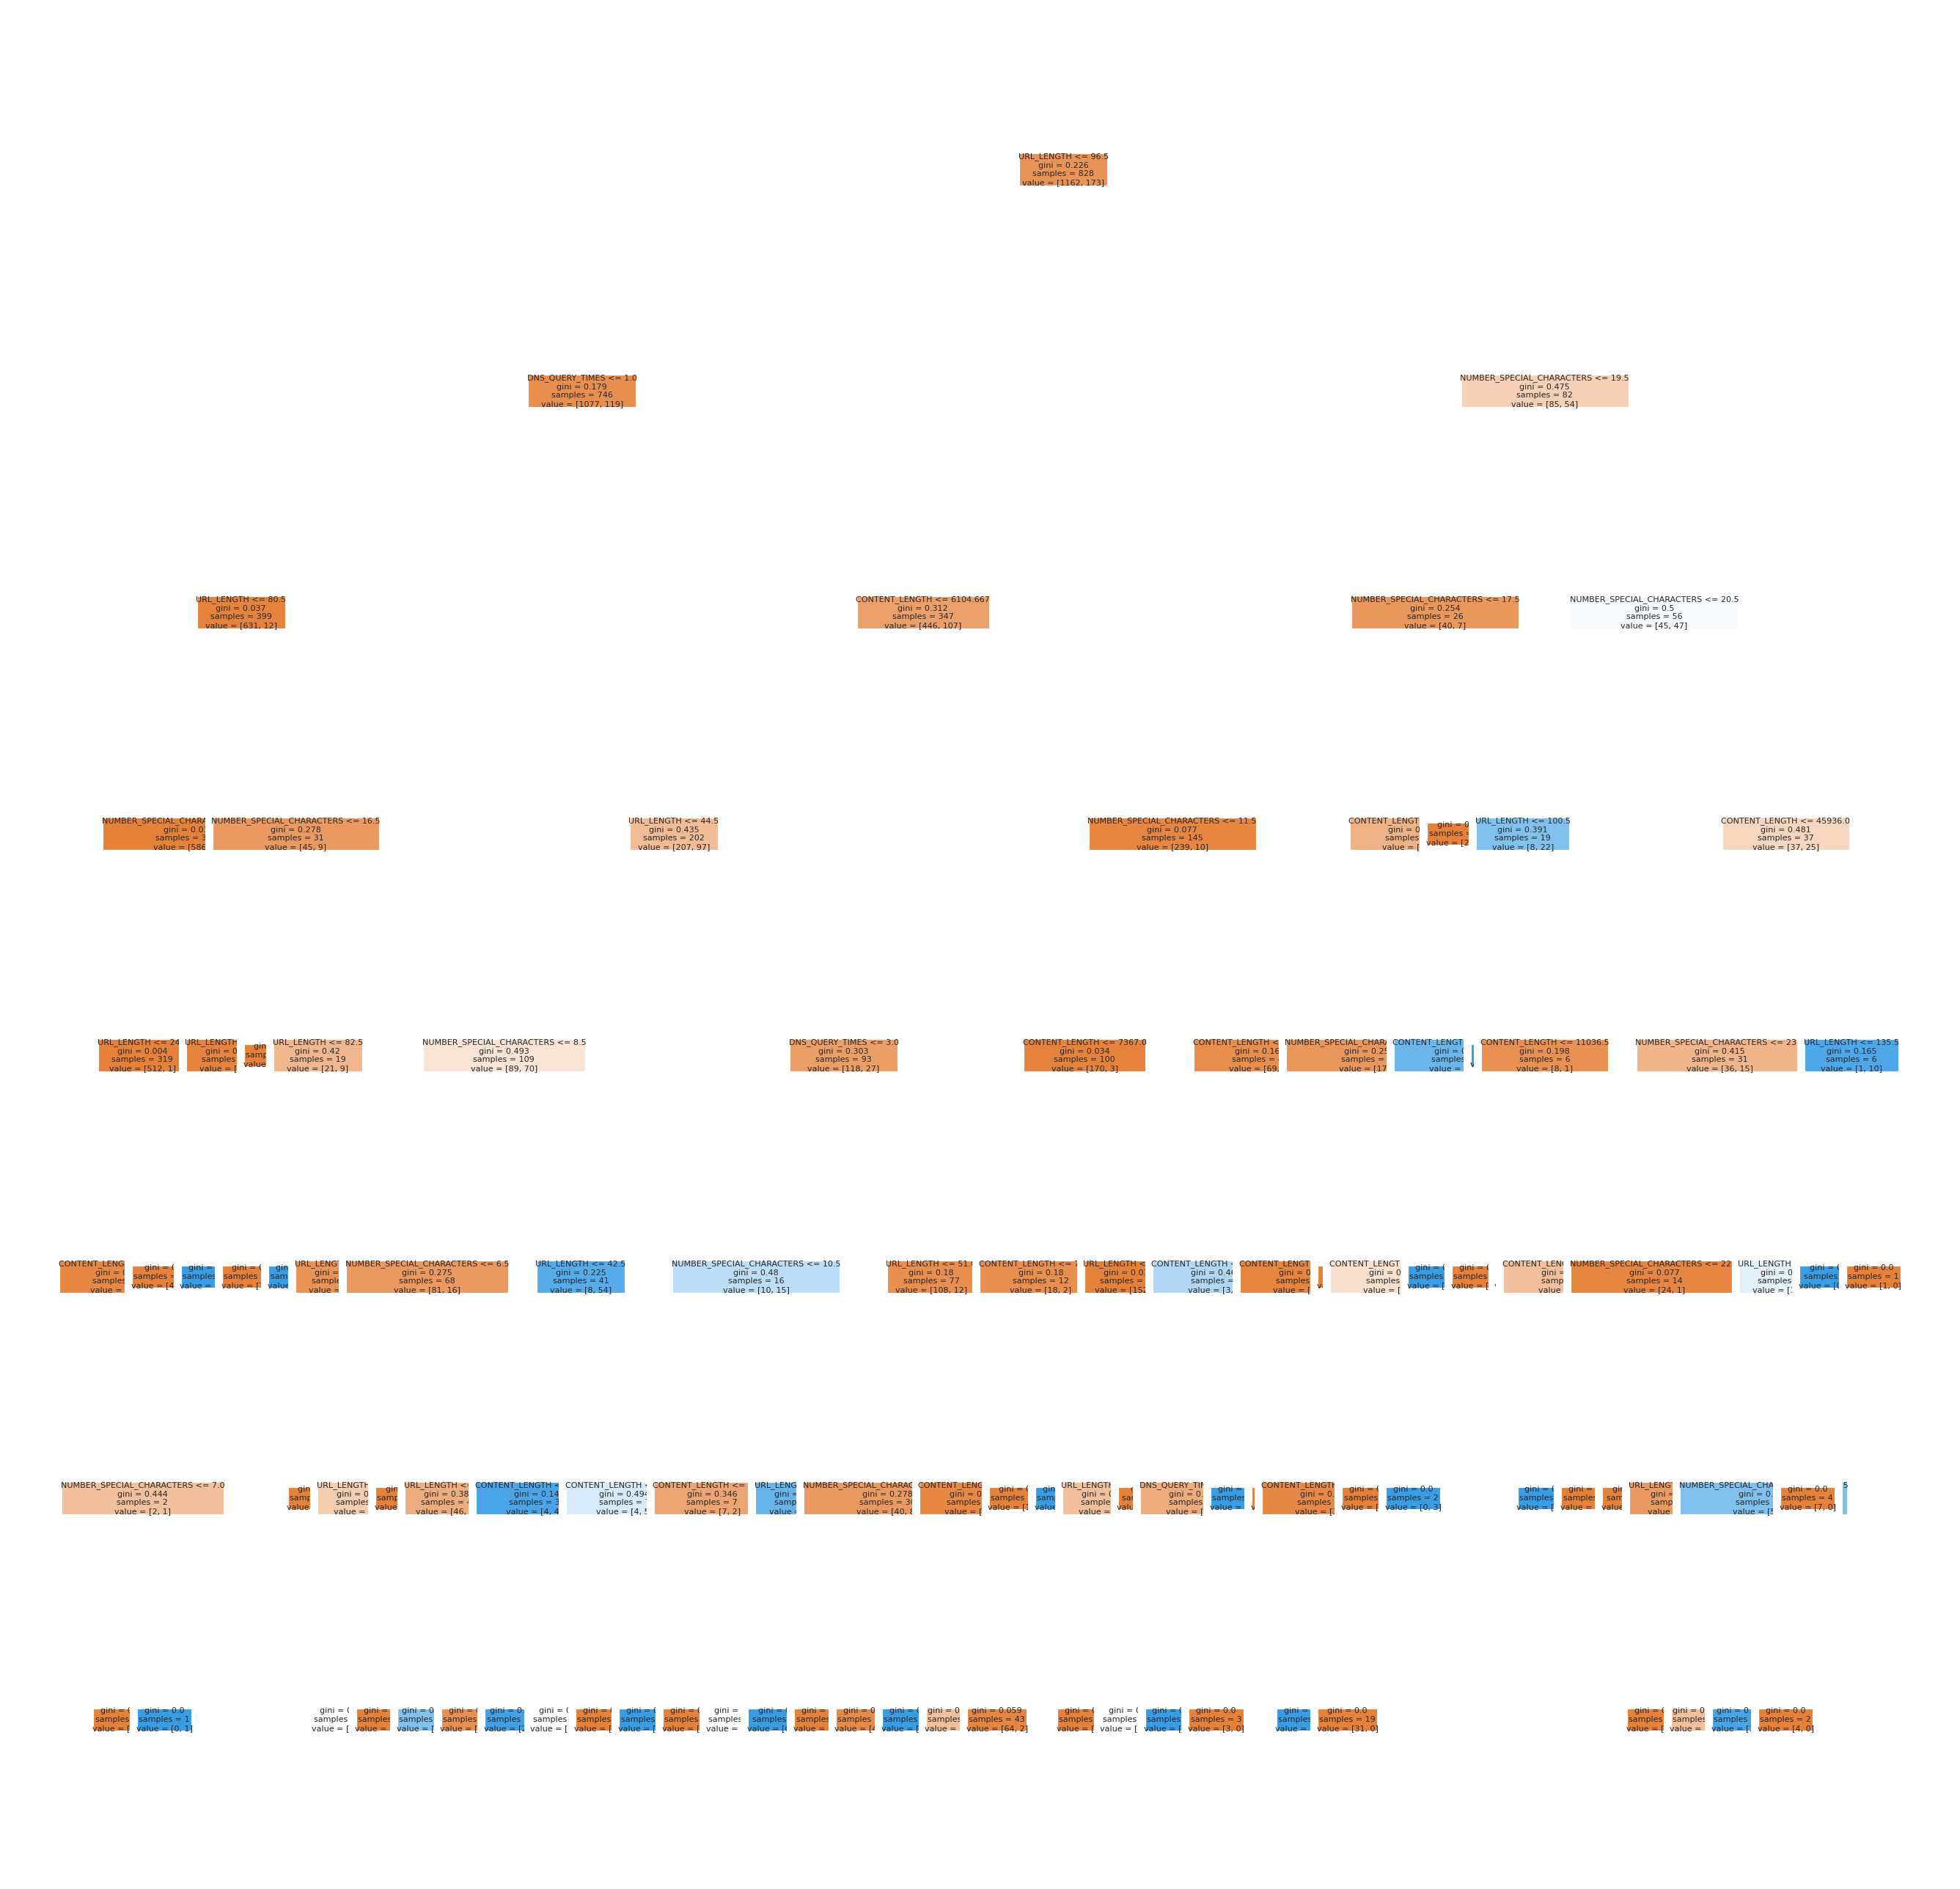

In [39]:
from sklearn.tree import export_graphviz
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator,
               feature_names = X_train.columns, 
               filled = True);
fig.savefig('clf_individualtree.png')